In [1]:
!pip3 install tensorflow==2.10.0

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import math

SAMPLES = 1000
SEED = 1337
np.random.seed(SEED)
tf.random.set_seed(SEED)

2022-11-12 18:16:32.646753: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
# Generate a uniformly distributed set of random numbers in the range from
# 0 to 2π, which covers a complete sine wave oscillation
x_values = np.random.uniform(low=0, high=2*math.pi, size=SAMPLES)

# Shuffle the values to guarantee they're not in order
np.random.shuffle(x_values)

# Calculate the corresponding sine values
y_values = np.sin(x_values)

# Step 2
# Add a small random number to each y value
y_values += 0.1 * np.random.randn(*y_values.shape)


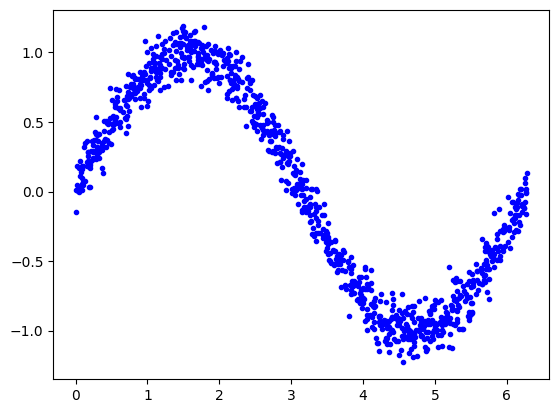

In [4]:
# Plot our data. The 'b.' argument tells the library to print blue dots.
plt.plot(x_values, y_values, 'b.')
plt.show()


In [5]:
# We'll use 60% of our data for training and 20% for testing. The remaining 20%
# will be used for validation. Calculate the indices of each section.
TRAIN_SPLIT = int(0.6 * SAMPLES)
TEST_SPLIT = int(0.2 * SAMPLES + TRAIN_SPLIT)

x_train, x_validate, x_test = np.split(x_values, [TRAIN_SPLIT, TEST_SPLIT])
y_train, y_validate, y_test = np.split(y_values, [TRAIN_SPLIT, TEST_SPLIT])

assert (x_train.size + x_validate.size + x_test.size) ==  SAMPLES

In [6]:

model_1 = tf.keras.Sequential()

# First layer takes a scalar input and feeds it through 16 "neurons." The
# neurons decide whether to activate based on the 'relu' activation function.
model_1.add(tf.keras.layers.Dense(16, activation='relu', input_shape=(1,)))

# Final layer is a single neuron, since we want to output a single value
model_1.add(tf.keras.layers.Dense(1))

# Compile the model using a standard optimizer and loss function for regression
model_1.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

# Print a summary of the model's architecture
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                32        
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________


2022-11-12 18:16:41.400617: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/1000
38/38 [==============================] - 1s 5ms/step - loss: 0.4032 - mae: 0.5484 - val_loss: 0.4052 - val_mae: 0.5525
Epoch 2/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.3665 - mae: 0.5261 - val_loss: 0.3740 - val_mae: 0.5249
Epoch 3/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.3369 - mae: 0.5035 - val_loss: 0.3441 - val_mae: 0.5074
Epoch 4/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.3116 - mae: 0.4855 - val_loss: 0.3165 - val_mae: 0.4843
Epoch 5/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.2883 - mae: 0.4687 - val_loss: 0.2912 - val_mae: 0.4637
Epoch 6/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.2658 - mae: 0.4511 - val_loss: 0.2717 - val_mae: 0.4469
Epoch 7/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.2481 - mae: 0.4362 - val_loss: 0.2566 - val_mae: 0.4378
Epoch 8/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.

38/38 [==============================] - 0s 2ms/step - loss: 0.1607 - mae: 0.3339 - val_loss: 0.1671 - val_mae: 0.3314
Epoch 63/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.1612 - mae: 0.3334 - val_loss: 0.1649 - val_mae: 0.3328
Epoch 64/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.1622 - mae: 0.3313 - val_loss: 0.1653 - val_mae: 0.3372
Epoch 65/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.1614 - mae: 0.3325 - val_loss: 0.1643 - val_mae: 0.3346
Epoch 66/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.1616 - mae: 0.3316 - val_loss: 0.1644 - val_mae: 0.3328
Epoch 67/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.1623 - mae: 0.3315 - val_loss: 0.1641 - val_mae: 0.3342
Epoch 68/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.1626 - mae: 0.3327 - val_loss: 0.1641 - val_mae: 0.3343
Epoch 69/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.1612 -

38/38 [==============================] - 0s 2ms/step - loss: 0.1587 - mae: 0.3248 - val_loss: 0.1622 - val_mae: 0.3256
Epoch 124/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.1582 - mae: 0.3238 - val_loss: 0.1658 - val_mae: 0.3333
Epoch 125/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.1594 - mae: 0.3254 - val_loss: 0.1634 - val_mae: 0.3240
Epoch 126/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.1574 - mae: 0.3224 - val_loss: 0.1619 - val_mae: 0.3254
Epoch 127/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.1597 - mae: 0.3257 - val_loss: 0.1616 - val_mae: 0.3269
Epoch 128/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.1594 - mae: 0.3250 - val_loss: 0.1635 - val_mae: 0.3307
Epoch 129/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.1584 - mae: 0.3249 - val_loss: 0.1620 - val_mae: 0.3282
Epoch 130/1000
38/38 [==============================] - 0s 2ms/step - loss: 0

38/38 [==============================] - 0s 2ms/step - loss: 0.1569 - mae: 0.3214 - val_loss: 0.1618 - val_mae: 0.3203
Epoch 185/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.1576 - mae: 0.3212 - val_loss: 0.1628 - val_mae: 0.3273
Epoch 186/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.1575 - mae: 0.3215 - val_loss: 0.1632 - val_mae: 0.3192
Epoch 187/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.1578 - mae: 0.3190 - val_loss: 0.1618 - val_mae: 0.3193
Epoch 188/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.1578 - mae: 0.3204 - val_loss: 0.1610 - val_mae: 0.3246
Epoch 189/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.1572 - mae: 0.3196 - val_loss: 0.1605 - val_mae: 0.3236
Epoch 190/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.1573 - mae: 0.3205 - val_loss: 0.1610 - val_mae: 0.3197
Epoch 191/1000
38/38 [==============================] - 0s 2ms/step - loss: 0

38/38 [==============================] - 0s 2ms/step - loss: 0.1571 - mae: 0.3167 - val_loss: 0.1618 - val_mae: 0.3235
Epoch 246/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.1560 - mae: 0.3168 - val_loss: 0.1646 - val_mae: 0.3261
Epoch 247/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.1567 - mae: 0.3169 - val_loss: 0.1614 - val_mae: 0.3230
Epoch 248/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.1569 - mae: 0.3179 - val_loss: 0.1598 - val_mae: 0.3175
Epoch 249/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.1565 - mae: 0.3178 - val_loss: 0.1601 - val_mae: 0.3165
Epoch 250/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.1580 - mae: 0.3185 - val_loss: 0.1593 - val_mae: 0.3186
Epoch 251/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.1567 - mae: 0.3168 - val_loss: 0.1597 - val_mae: 0.3204
Epoch 252/1000
38/38 [==============================] - 0s 2ms/step - loss: 0

38/38 [==============================] - 0s 2ms/step - loss: 0.1566 - mae: 0.3147 - val_loss: 0.1592 - val_mae: 0.3145
Epoch 307/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.1568 - mae: 0.3147 - val_loss: 0.1590 - val_mae: 0.3176
Epoch 308/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.1558 - mae: 0.3142 - val_loss: 0.1618 - val_mae: 0.3217
Epoch 309/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.1558 - mae: 0.3130 - val_loss: 0.1611 - val_mae: 0.3210
Epoch 310/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.1553 - mae: 0.3148 - val_loss: 0.1616 - val_mae: 0.3129
Epoch 311/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.1564 - mae: 0.3155 - val_loss: 0.1609 - val_mae: 0.3206
Epoch 312/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.1556 - mae: 0.3148 - val_loss: 0.1608 - val_mae: 0.3205
Epoch 313/1000
38/38 [==============================] - 0s 2ms/step - loss: 0

38/38 [==============================] - 0s 2ms/step - loss: 0.1556 - mae: 0.3140 - val_loss: 0.1585 - val_mae: 0.3142
Epoch 368/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.1554 - mae: 0.3126 - val_loss: 0.1601 - val_mae: 0.3188
Epoch 369/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.1545 - mae: 0.3135 - val_loss: 0.1592 - val_mae: 0.3174
Epoch 370/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.1554 - mae: 0.3127 - val_loss: 0.1602 - val_mae: 0.3187
Epoch 371/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.1551 - mae: 0.3131 - val_loss: 0.1588 - val_mae: 0.3166
Epoch 372/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.1560 - mae: 0.3131 - val_loss: 0.1583 - val_mae: 0.3144
Epoch 373/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.1554 - mae: 0.3121 - val_loss: 0.1583 - val_mae: 0.3148
Epoch 374/1000
38/38 [==============================] - 0s 2ms/step - loss: 0

38/38 [==============================] - 0s 2ms/step - loss: 0.1536 - mae: 0.3096 - val_loss: 0.1624 - val_mae: 0.3194
Epoch 429/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.1556 - mae: 0.3119 - val_loss: 0.1581 - val_mae: 0.3140
Epoch 430/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.1543 - mae: 0.3105 - val_loss: 0.1599 - val_mae: 0.3170
Epoch 431/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.1554 - mae: 0.3116 - val_loss: 0.1587 - val_mae: 0.3108
Epoch 432/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.1552 - mae: 0.3118 - val_loss: 0.1606 - val_mae: 0.3180
Epoch 433/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.1552 - mae: 0.3125 - val_loss: 0.1585 - val_mae: 0.3151
Epoch 434/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.1531 - mae: 0.3111 - val_loss: 0.1611 - val_mae: 0.3097
Epoch 435/1000
38/38 [==============================] - 0s 2ms/step - loss: 0

38/38 [==============================] - 0s 2ms/step - loss: 0.1546 - mae: 0.3108 - val_loss: 0.1579 - val_mae: 0.3134
Epoch 490/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.1546 - mae: 0.3120 - val_loss: 0.1660 - val_mae: 0.3226
Epoch 491/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.1559 - mae: 0.3125 - val_loss: 0.1581 - val_mae: 0.3111
Epoch 492/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.1544 - mae: 0.3107 - val_loss: 0.1605 - val_mae: 0.3173
Epoch 493/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.1547 - mae: 0.3107 - val_loss: 0.1585 - val_mae: 0.3147
Epoch 494/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.1548 - mae: 0.3118 - val_loss: 0.1619 - val_mae: 0.3087
Epoch 495/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.1547 - mae: 0.3103 - val_loss: 0.1578 - val_mae: 0.3128
Epoch 496/1000
38/38 [==============================] - 0s 2ms/step - loss: 0

38/38 [==============================] - 0s 2ms/step - loss: 0.1540 - mae: 0.3072 - val_loss: 0.1593 - val_mae: 0.3149
Epoch 551/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.1547 - mae: 0.3099 - val_loss: 0.1577 - val_mae: 0.3097
Epoch 552/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.1543 - mae: 0.3102 - val_loss: 0.1584 - val_mae: 0.3135
Epoch 553/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.1545 - mae: 0.3093 - val_loss: 0.1674 - val_mae: 0.3225
Epoch 554/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.1561 - mae: 0.3104 - val_loss: 0.1577 - val_mae: 0.3103
Epoch 555/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.1530 - mae: 0.3061 - val_loss: 0.1585 - val_mae: 0.3139
Epoch 556/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.1540 - mae: 0.3093 - val_loss: 0.1619 - val_mae: 0.3076
Epoch 557/1000
38/38 [==============================] - 0s 2ms/step - loss: 0

38/38 [==============================] - 0s 2ms/step - loss: 0.1530 - mae: 0.3083 - val_loss: 0.1612 - val_mae: 0.3066
Epoch 612/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.1549 - mae: 0.3090 - val_loss: 0.1579 - val_mae: 0.3085
Epoch 613/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.1550 - mae: 0.3107 - val_loss: 0.1575 - val_mae: 0.3109
Epoch 614/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.1529 - mae: 0.3075 - val_loss: 0.1594 - val_mae: 0.3073
Epoch 615/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.1554 - mae: 0.3101 - val_loss: 0.1578 - val_mae: 0.3083
Epoch 616/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.1535 - mae: 0.3066 - val_loss: 0.1646 - val_mae: 0.3192
Epoch 617/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.1539 - mae: 0.3083 - val_loss: 0.1605 - val_mae: 0.3157
Epoch 618/1000
38/38 [==============================] - 0s 2ms/step - loss: 0

38/38 [==============================] - 0s 2ms/step - loss: 0.1533 - mae: 0.3064 - val_loss: 0.1590 - val_mae: 0.3069
Epoch 673/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.1537 - mae: 0.3064 - val_loss: 0.1582 - val_mae: 0.3126
Epoch 674/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.1543 - mae: 0.3088 - val_loss: 0.1578 - val_mae: 0.3117
Epoch 675/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.1528 - mae: 0.3063 - val_loss: 0.1632 - val_mae: 0.3065
Epoch 676/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.1548 - mae: 0.3070 - val_loss: 0.1579 - val_mae: 0.3084
Epoch 677/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.1554 - mae: 0.3101 - val_loss: 0.1579 - val_mae: 0.3081
Epoch 678/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.1537 - mae: 0.3063 - val_loss: 0.1586 - val_mae: 0.3133
Epoch 679/1000
38/38 [==============================] - 0s 2ms/step - loss: 0

38/38 [==============================] - 0s 2ms/step - loss: 0.1539 - mae: 0.3066 - val_loss: 0.1591 - val_mae: 0.3138
Epoch 734/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.1543 - mae: 0.3084 - val_loss: 0.1595 - val_mae: 0.3144
Epoch 735/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.1549 - mae: 0.3084 - val_loss: 0.1576 - val_mae: 0.3111
Epoch 736/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.1545 - mae: 0.3096 - val_loss: 0.1575 - val_mae: 0.3099
Epoch 737/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.1548 - mae: 0.3091 - val_loss: 0.1585 - val_mae: 0.3132
Epoch 738/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.1541 - mae: 0.3084 - val_loss: 0.1601 - val_mae: 0.3151
Epoch 739/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.1528 - mae: 0.3060 - val_loss: 0.1586 - val_mae: 0.3133
Epoch 740/1000
38/38 [==============================] - 0s 2ms/step - loss: 0

38/38 [==============================] - 0s 2ms/step - loss: 0.1539 - mae: 0.3078 - val_loss: 0.1651 - val_mae: 0.3191
Epoch 795/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.1546 - mae: 0.3080 - val_loss: 0.1574 - val_mae: 0.3097
Epoch 796/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.1546 - mae: 0.3078 - val_loss: 0.1590 - val_mae: 0.3133
Epoch 797/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.1540 - mae: 0.3075 - val_loss: 0.1584 - val_mae: 0.3124
Epoch 798/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.1523 - mae: 0.3065 - val_loss: 0.1604 - val_mae: 0.3147
Epoch 799/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.1548 - mae: 0.3096 - val_loss: 0.1575 - val_mae: 0.3108
Epoch 800/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.1538 - mae: 0.3077 - val_loss: 0.1575 - val_mae: 0.3099
Epoch 801/1000
38/38 [==============================] - 0s 2ms/step - loss: 0

38/38 [==============================] - 0s 2ms/step - loss: 0.1546 - mae: 0.3082 - val_loss: 0.1599 - val_mae: 0.3061
Epoch 856/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.1539 - mae: 0.3070 - val_loss: 0.1574 - val_mae: 0.3087
Epoch 857/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.1539 - mae: 0.3076 - val_loss: 0.1573 - val_mae: 0.3093
Epoch 858/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.1529 - mae: 0.3082 - val_loss: 0.1581 - val_mae: 0.3072
Epoch 859/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.1545 - mae: 0.3086 - val_loss: 0.1576 - val_mae: 0.3107
Epoch 860/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.1543 - mae: 0.3080 - val_loss: 0.1579 - val_mae: 0.3076
Epoch 861/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.1531 - mae: 0.3070 - val_loss: 0.1575 - val_mae: 0.3085
Epoch 862/1000
38/38 [==============================] - 0s 2ms/step - loss: 0

38/38 [==============================] - 0s 2ms/step - loss: 0.1548 - mae: 0.3092 - val_loss: 0.1574 - val_mae: 0.3085
Epoch 917/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.1544 - mae: 0.3082 - val_loss: 0.1574 - val_mae: 0.3086
Epoch 918/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.1535 - mae: 0.3070 - val_loss: 0.1659 - val_mae: 0.3195
Epoch 919/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.1550 - mae: 0.3080 - val_loss: 0.1667 - val_mae: 0.3199
Epoch 920/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.1540 - mae: 0.3074 - val_loss: 0.1577 - val_mae: 0.3110
Epoch 921/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.1516 - mae: 0.3038 - val_loss: 0.1574 - val_mae: 0.3090
Epoch 922/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.1545 - mae: 0.3073 - val_loss: 0.1574 - val_mae: 0.3094
Epoch 923/1000
38/38 [==============================] - 0s 2ms/step - loss: 0

38/38 [==============================] - 0s 2ms/step - loss: 0.1540 - mae: 0.3086 - val_loss: 0.1588 - val_mae: 0.3126
Epoch 978/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.1528 - mae: 0.3050 - val_loss: 0.1604 - val_mae: 0.3142
Epoch 979/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.1537 - mae: 0.3095 - val_loss: 0.1576 - val_mae: 0.3104
Epoch 980/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.1543 - mae: 0.3075 - val_loss: 0.1591 - val_mae: 0.3064
Epoch 981/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.1537 - mae: 0.3076 - val_loss: 0.1587 - val_mae: 0.3068
Epoch 982/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.1538 - mae: 0.3058 - val_loss: 0.1591 - val_mae: 0.3067
Epoch 983/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.1550 - mae: 0.3081 - val_loss: 0.1589 - val_mae: 0.3129
Epoch 984/1000
38/38 [==============================] - 0s 2ms/step - loss: 0

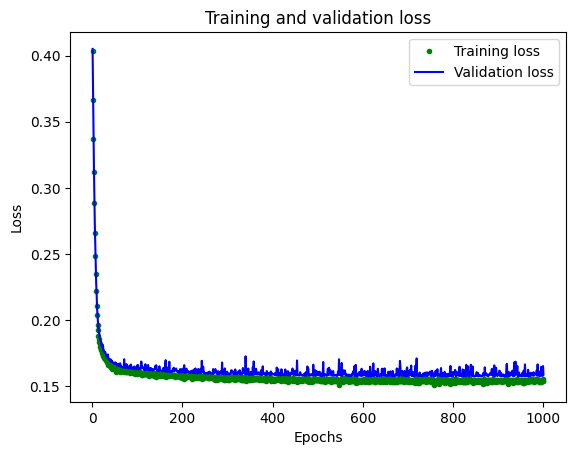

In [7]:
## TRAINING OUR MODEL ##
history_1 = model_1.fit(x_train, y_train, epochs=1000, batch_size=16, validation_data=(x_validate, y_validate))
loss = history_1.history['loss']
val_loss = history_1.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'g.', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

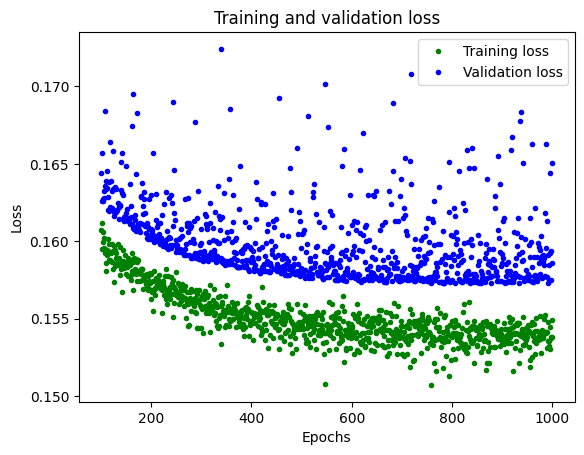

In [8]:
# Exclude the first few epochs so the graph is easier to read
SKIP = 100

plt.plot(epochs[SKIP:], loss[SKIP:], 'g.', label='Training loss')
plt.plot(epochs[SKIP:], val_loss[SKIP:], 'b.', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

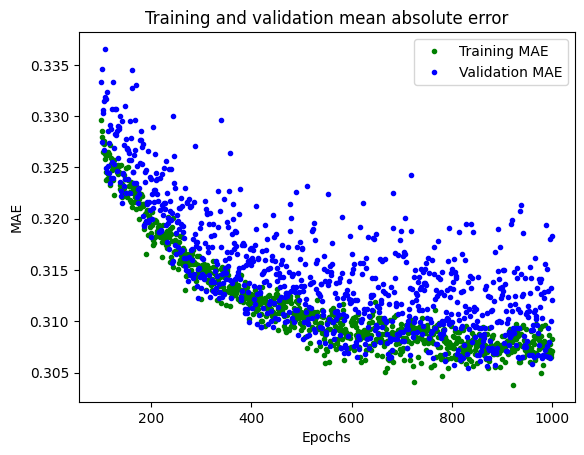

In [9]:
# Draw a graph of mean absolute error, which is another way of
# measuring the amount of error in the prediction.
mae = history_1.history['mae']
val_mae = history_1.history['val_mae']

plt.plot(epochs[SKIP:], mae[SKIP:], 'g.', label='Training MAE')
plt.plot(epochs[SKIP:], val_mae[SKIP:], 'b.', label='Validation MAE')
plt.title('Training and validation mean absolute error')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

19/19 [==============================] - 0s 905us/step


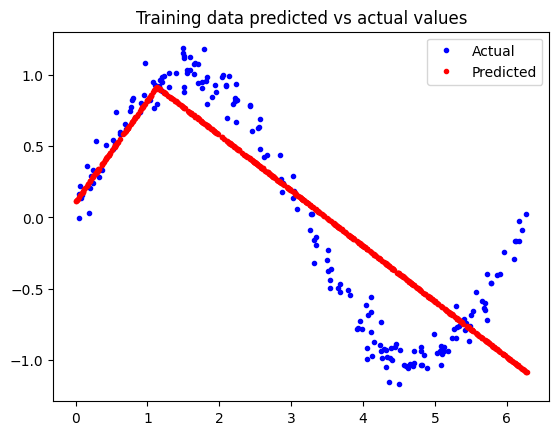

In [10]:
# Use the model to make predictions from our validation data
predictions = model_1.predict(x_train)

# Plot the predictions along with the test data
plt.clf()
plt.title('Training data predicted vs actual values')
plt.plot(x_test, y_test, 'b.', label='Actual')
plt.plot(x_train, predictions, 'r.', label='Predicted')
plt.legend()
plt.show()

In [11]:
model_2 = tf.keras.Sequential()

# First layer takes a scalar input and feeds it through 16 "neurons." The
# neurons decide whether to activate based on the 'relu' activation function.
model_2.add(tf.keras.layers.Dense(16, activation='relu', input_shape=(1,)))

# The new second layer may help the network learn more complex representations
model_2.add(tf.keras.layers.Dense(16, activation='relu'))

# Final layer is a single neuron, since we want to output a single value
model_2.add(tf.keras.layers.Dense(1))

# Compile the model using a standard optimizer and loss function for regression
model_2.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

# Show a summary of the model
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 16)                32        
                                                                 
 dense_3 (Dense)             (None, 16)                272       
                                                                 
 dense_4 (Dense)             (None, 1)                 17        
                                                                 
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________


In [12]:
history_2 = model_2.fit(x_train, y_train, epochs=600, batch_size=16,
                     validation_data=(x_validate, y_validate))


Epoch 1/600
38/38 [==============================] - 1s 5ms/step - loss: 0.4276 - mae: 0.5512 - val_loss: 0.3716 - val_mae: 0.5269
Epoch 2/600
38/38 [==============================] - 0s 2ms/step - loss: 0.3262 - mae: 0.4963 - val_loss: 0.3223 - val_mae: 0.4826
Epoch 3/600
38/38 [==============================] - 0s 3ms/step - loss: 0.2790 - mae: 0.4592 - val_loss: 0.2745 - val_mae: 0.4502
Epoch 4/600
38/38 [==============================] - 0s 2ms/step - loss: 0.2435 - mae: 0.4296 - val_loss: 0.2405 - val_mae: 0.4202
Epoch 5/600
38/38 [==============================] - 0s 2ms/step - loss: 0.2172 - mae: 0.4069 - val_loss: 0.2118 - val_mae: 0.3938
Epoch 6/600
38/38 [==============================] - 0s 2ms/step - loss: 0.1960 - mae: 0.3852 - val_loss: 0.1998 - val_mae: 0.3760
Epoch 7/600
38/38 [==============================] - 0s 2ms/step - loss: 0.1849 - mae: 0.3717 - val_loss: 0.1920 - val_mae: 0.3743
Epoch 8/600
38/38 [==============================] - 0s 2ms/step - loss: 0.1775 - m

38/38 [==============================] - 0s 2ms/step - loss: 0.1549 - mae: 0.3091 - val_loss: 0.1574 - val_mae: 0.3079
Epoch 64/600
38/38 [==============================] - 0s 2ms/step - loss: 0.1567 - mae: 0.3066 - val_loss: 0.1576 - val_mae: 0.3096
Epoch 65/600
38/38 [==============================] - 0s 2ms/step - loss: 0.1543 - mae: 0.3062 - val_loss: 0.1576 - val_mae: 0.3096
Epoch 66/600
38/38 [==============================] - 0s 2ms/step - loss: 0.1558 - mae: 0.3067 - val_loss: 0.1580 - val_mae: 0.3062
Epoch 67/600
38/38 [==============================] - 0s 2ms/step - loss: 0.1571 - mae: 0.3063 - val_loss: 0.1574 - val_mae: 0.3075
Epoch 68/600
38/38 [==============================] - 0s 2ms/step - loss: 0.1592 - mae: 0.3102 - val_loss: 0.1581 - val_mae: 0.3071
Epoch 69/600
38/38 [==============================] - 0s 2ms/step - loss: 0.1552 - mae: 0.3062 - val_loss: 0.1578 - val_mae: 0.3067
Epoch 70/600
38/38 [==============================] - 0s 2ms/step - loss: 0.1574 - mae: 0

Epoch 125/600
38/38 [==============================] - 0s 2ms/step - loss: 0.1214 - mae: 0.2641 - val_loss: 0.1358 - val_mae: 0.2641
Epoch 126/600
38/38 [==============================] - 0s 2ms/step - loss: 0.1168 - mae: 0.2571 - val_loss: 0.1221 - val_mae: 0.2604
Epoch 127/600
38/38 [==============================] - 0s 2ms/step - loss: 0.1185 - mae: 0.2600 - val_loss: 0.1206 - val_mae: 0.2644
Epoch 128/600
38/38 [==============================] - 0s 2ms/step - loss: 0.1176 - mae: 0.2594 - val_loss: 0.1247 - val_mae: 0.2706
Epoch 129/600
38/38 [==============================] - 0s 2ms/step - loss: 0.1145 - mae: 0.2561 - val_loss: 0.1207 - val_mae: 0.2653
Epoch 130/600
38/38 [==============================] - 0s 2ms/step - loss: 0.1139 - mae: 0.2552 - val_loss: 0.1195 - val_mae: 0.2640
Epoch 131/600
38/38 [==============================] - 0s 2ms/step - loss: 0.1118 - mae: 0.2531 - val_loss: 0.1183 - val_mae: 0.2643
Epoch 132/600
38/38 [==============================] - 0s 2ms/step - 

38/38 [==============================] - 0s 2ms/step - loss: 0.0358 - mae: 0.1420 - val_loss: 0.0373 - val_mae: 0.1353
Epoch 187/600
38/38 [==============================] - 0s 2ms/step - loss: 0.0343 - mae: 0.1362 - val_loss: 0.0354 - val_mae: 0.1373
Epoch 188/600
38/38 [==============================] - 0s 2ms/step - loss: 0.0338 - mae: 0.1376 - val_loss: 0.0343 - val_mae: 0.1350
Epoch 189/600
38/38 [==============================] - 0s 2ms/step - loss: 0.0321 - mae: 0.1338 - val_loss: 0.0359 - val_mae: 0.1415
Epoch 190/600
38/38 [==============================] - 0s 2ms/step - loss: 0.0313 - mae: 0.1343 - val_loss: 0.0319 - val_mae: 0.1276
Epoch 191/600
38/38 [==============================] - 0s 2ms/step - loss: 0.0310 - mae: 0.1309 - val_loss: 0.0321 - val_mae: 0.1315
Epoch 192/600
38/38 [==============================] - 0s 2ms/step - loss: 0.0304 - mae: 0.1306 - val_loss: 0.0298 - val_mae: 0.1264
Epoch 193/600
38/38 [==============================] - 0s 2ms/step - loss: 0.0298 -

Epoch 248/600
38/38 [==============================] - 0s 2ms/step - loss: 0.0145 - mae: 0.0963 - val_loss: 0.0203 - val_mae: 0.1119
Epoch 249/600
38/38 [==============================] - 0s 2ms/step - loss: 0.0144 - mae: 0.0949 - val_loss: 0.0144 - val_mae: 0.0937
Epoch 250/600
38/38 [==============================] - 0s 2ms/step - loss: 0.0152 - mae: 0.0988 - val_loss: 0.0130 - val_mae: 0.0886
Epoch 251/600
38/38 [==============================] - 0s 2ms/step - loss: 0.0149 - mae: 0.0979 - val_loss: 0.0133 - val_mae: 0.0905
Epoch 252/600
38/38 [==============================] - 0s 2ms/step - loss: 0.0150 - mae: 0.0959 - val_loss: 0.0164 - val_mae: 0.1010
Epoch 253/600
38/38 [==============================] - 0s 2ms/step - loss: 0.0141 - mae: 0.0934 - val_loss: 0.0142 - val_mae: 0.0956
Epoch 254/600
38/38 [==============================] - 0s 2ms/step - loss: 0.0150 - mae: 0.0966 - val_loss: 0.0127 - val_mae: 0.0884
Epoch 255/600
38/38 [==============================] - 0s 2ms/step - 

38/38 [==============================] - 0s 2ms/step - loss: 0.0135 - mae: 0.0923 - val_loss: 0.0118 - val_mae: 0.0863
Epoch 310/600
38/38 [==============================] - 0s 2ms/step - loss: 0.0135 - mae: 0.0926 - val_loss: 0.0118 - val_mae: 0.0859
Epoch 311/600
38/38 [==============================] - 0s 2ms/step - loss: 0.0130 - mae: 0.0903 - val_loss: 0.0173 - val_mae: 0.1046
Epoch 312/600
38/38 [==============================] - 0s 2ms/step - loss: 0.0130 - mae: 0.0902 - val_loss: 0.0209 - val_mae: 0.1181
Epoch 313/600
38/38 [==============================] - 0s 2ms/step - loss: 0.0137 - mae: 0.0944 - val_loss: 0.0124 - val_mae: 0.0884
Epoch 314/600
38/38 [==============================] - 0s 2ms/step - loss: 0.0132 - mae: 0.0921 - val_loss: 0.0144 - val_mae: 0.0966
Epoch 315/600
38/38 [==============================] - 0s 2ms/step - loss: 0.0137 - mae: 0.0937 - val_loss: 0.0115 - val_mae: 0.0849
Epoch 316/600
38/38 [==============================] - 0s 2ms/step - loss: 0.0135 -

Epoch 371/600
38/38 [==============================] - 0s 2ms/step - loss: 0.0133 - mae: 0.0919 - val_loss: 0.0119 - val_mae: 0.0871
Epoch 372/600
38/38 [==============================] - 0s 2ms/step - loss: 0.0134 - mae: 0.0928 - val_loss: 0.0131 - val_mae: 0.0901
Epoch 373/600
38/38 [==============================] - 0s 2ms/step - loss: 0.0136 - mae: 0.0937 - val_loss: 0.0155 - val_mae: 0.0981
Epoch 374/600
38/38 [==============================] - 0s 2ms/step - loss: 0.0131 - mae: 0.0925 - val_loss: 0.0117 - val_mae: 0.0856
Epoch 375/600
38/38 [==============================] - 0s 2ms/step - loss: 0.0125 - mae: 0.0914 - val_loss: 0.0117 - val_mae: 0.0857
Epoch 376/600
38/38 [==============================] - 0s 2ms/step - loss: 0.0135 - mae: 0.0924 - val_loss: 0.0113 - val_mae: 0.0835
Epoch 377/600
38/38 [==============================] - 0s 2ms/step - loss: 0.0132 - mae: 0.0921 - val_loss: 0.0138 - val_mae: 0.0933
Epoch 378/600
38/38 [==============================] - 0s 2ms/step - 

38/38 [==============================] - 0s 2ms/step - loss: 0.0131 - mae: 0.0920 - val_loss: 0.0112 - val_mae: 0.0834
Epoch 433/600
38/38 [==============================] - 0s 2ms/step - loss: 0.0131 - mae: 0.0925 - val_loss: 0.0169 - val_mae: 0.1018
Epoch 434/600
38/38 [==============================] - 0s 2ms/step - loss: 0.0135 - mae: 0.0927 - val_loss: 0.0115 - val_mae: 0.0852
Epoch 435/600
38/38 [==============================] - 0s 2ms/step - loss: 0.0127 - mae: 0.0911 - val_loss: 0.0127 - val_mae: 0.0876
Epoch 436/600
38/38 [==============================] - 0s 2ms/step - loss: 0.0123 - mae: 0.0901 - val_loss: 0.0117 - val_mae: 0.0848
Epoch 437/600
38/38 [==============================] - 0s 2ms/step - loss: 0.0135 - mae: 0.0929 - val_loss: 0.0117 - val_mae: 0.0849
Epoch 438/600
38/38 [==============================] - 0s 2ms/step - loss: 0.0130 - mae: 0.0903 - val_loss: 0.0120 - val_mae: 0.0861
Epoch 439/600
38/38 [==============================] - 0s 2ms/step - loss: 0.0126 -

Epoch 494/600
38/38 [==============================] - 0s 2ms/step - loss: 0.0125 - mae: 0.0910 - val_loss: 0.0209 - val_mae: 0.1091
Epoch 495/600
38/38 [==============================] - 0s 2ms/step - loss: 0.0133 - mae: 0.0932 - val_loss: 0.0165 - val_mae: 0.1007
Epoch 496/600
38/38 [==============================] - 0s 2ms/step - loss: 0.0131 - mae: 0.0925 - val_loss: 0.0172 - val_mae: 0.1038
Epoch 497/600
38/38 [==============================] - 0s 2ms/step - loss: 0.0128 - mae: 0.0920 - val_loss: 0.0113 - val_mae: 0.0835
Epoch 498/600
38/38 [==============================] - 0s 2ms/step - loss: 0.0130 - mae: 0.0907 - val_loss: 0.0135 - val_mae: 0.0907
Epoch 499/600
38/38 [==============================] - 0s 2ms/step - loss: 0.0124 - mae: 0.0899 - val_loss: 0.0120 - val_mae: 0.0867
Epoch 500/600
38/38 [==============================] - 0s 2ms/step - loss: 0.0133 - mae: 0.0939 - val_loss: 0.0123 - val_mae: 0.0876
Epoch 501/600
38/38 [==============================] - 0s 2ms/step - 

38/38 [==============================] - 0s 2ms/step - loss: 0.0123 - mae: 0.0885 - val_loss: 0.0157 - val_mae: 0.0989
Epoch 556/600
38/38 [==============================] - 0s 2ms/step - loss: 0.0130 - mae: 0.0905 - val_loss: 0.0114 - val_mae: 0.0839
Epoch 557/600
38/38 [==============================] - 0s 2ms/step - loss: 0.0119 - mae: 0.0885 - val_loss: 0.0117 - val_mae: 0.0843
Epoch 558/600
38/38 [==============================] - 0s 2ms/step - loss: 0.0130 - mae: 0.0910 - val_loss: 0.0116 - val_mae: 0.0850
Epoch 559/600
38/38 [==============================] - 0s 2ms/step - loss: 0.0119 - mae: 0.0889 - val_loss: 0.0112 - val_mae: 0.0831
Epoch 560/600
38/38 [==============================] - 0s 2ms/step - loss: 0.0125 - mae: 0.0905 - val_loss: 0.0120 - val_mae: 0.0869
Epoch 561/600
38/38 [==============================] - 0s 2ms/step - loss: 0.0127 - mae: 0.0896 - val_loss: 0.0123 - val_mae: 0.0866
Epoch 562/600
38/38 [==============================] - 0s 2ms/step - loss: 0.0120 -

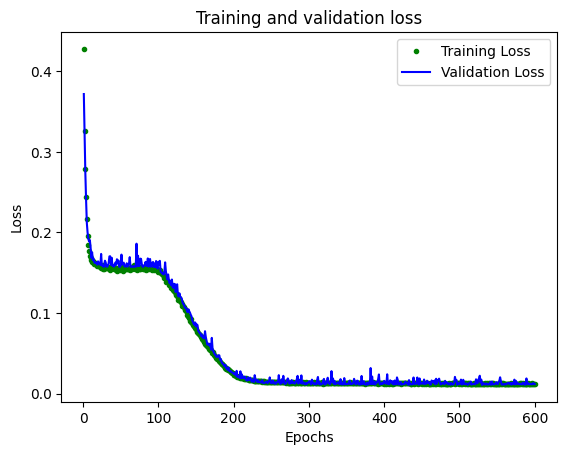

In [13]:
loss = history_2.history['loss']
val_loss = history_2.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'g.', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

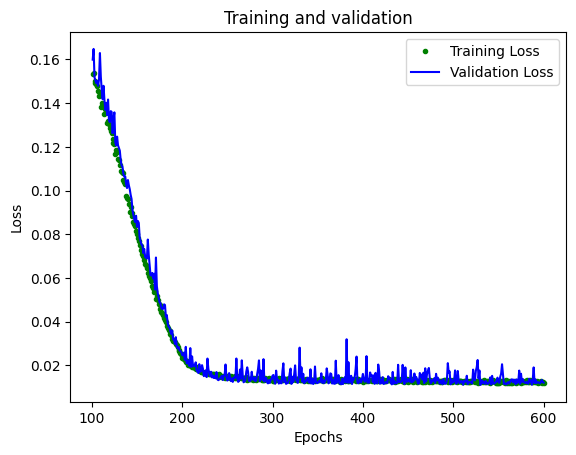

In [14]:
SKIP = 100

plt.clf()

plt.plot(epochs[SKIP:], loss[SKIP:], 'g.', label='Training Loss')
plt.plot(epochs[SKIP:], val_loss[SKIP:], 'b', label='Validation Loss')
plt.title('Training and validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

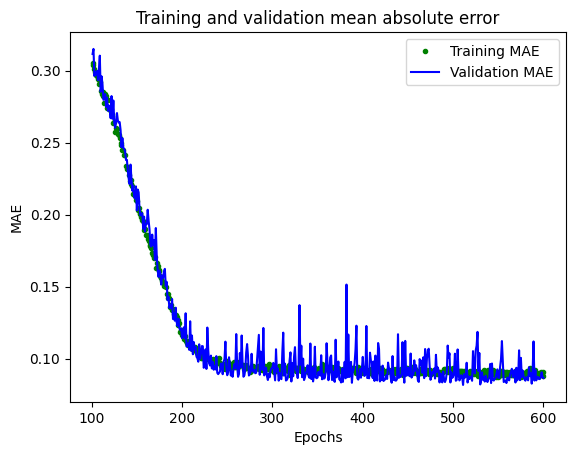

In [15]:
plt.clf()

#mean absolute error
mae = history_2.history['mae']
val_mae = history_2.history['val_mae']

plt.plot(epochs[SKIP:], mae[SKIP:], 'g.', label="Training MAE")
plt.plot(epochs[SKIP:], val_mae[SKIP:], 'b', label="Validation MAE")
plt.title('Training and validation mean absolute error')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

7/7 [==============================] - 0s 1ms/step


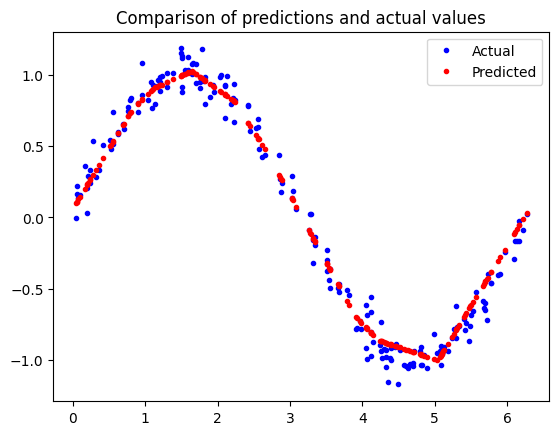

In [16]:
loss = model_2.evaluate(x_test, y_test)

predictions = model_2.predict(x_test)

plt.clf()
plt.title('Comparison of predictions and actual values')
plt.plot(x_test, y_test, 'b.', label='Actual')
plt.plot(x_test, predictions, 'r.', label='Predicted')
plt.legend()
plt.show()

In [19]:
print(tf.lite.TFLiteConverter.from_keras_model(model_2))


In [21]:
# Convert the model to the TensorFlow Lite format without quantization
converter = tf.lite.TFLiteConverter.from_keras_model(model_2)
tflite_model = converter.convert()

#save to disk
open("sine_model.tflite", "wb").write(tflite_model)

INFO:tensorflow:Assets written to: /var/folders/1x/g7qggz1x1_bdfwh69vdthcdr0000gn/T/tmpj8qn_sjv/assets


INFO:tensorflow:Assets written to: /var/folders/1x/g7qggz1x1_bdfwh69vdthcdr0000gn/T/tmpj8qn_sjv/assets
2022-11-12 18:50:37.160207: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:362] Ignored output_format.
2022-11-12 18:50:37.160222: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:365] Ignored drop_control_dependency.
2022-11-12 18:50:37.160336: I tensorflow/cc/saved_model/reader.cc:45] Reading SavedModel from: /var/folders/1x/g7qggz1x1_bdfwh69vdthcdr0000gn/T/tmpj8qn_sjv
2022-11-12 18:50:37.161454: I tensorflow/cc/saved_model/reader.cc:89] Reading meta graph with tags { serve }
2022-11-12 18:50:37.161466: I tensorflow/cc/saved_model/reader.cc:130] Reading SavedModel debug info (if present) from: /var/folders/1x/g7qggz1x1_bdfwh69vdthcdr0000gn/T/tmpj8qn_sjv
2022-11-12 18:50:37.165848: I tensorflow/cc/saved_model/loader.cc:229] Restoring SavedModel bundle.
2022-11-12 18:50:37.204784: I tensorflow/cc/saved_model/loader.cc:213] Running initialization

3192

In [23]:
#With quantization this time (default optimization)
converter = tf.lite.TFLiteConverter.from_keras_model(model_2)
converter.optimizations = [tf.lite.Optimize.DEFAULT]

# Define a generator function that provides our test data's x values
# as a representative dataset,
def representative_dataset_generator():
    for value in x_test:
        # Each scalar value must be inside of a 2D array that is wrapped in a list
        yield [np.array(value, dtype=np.float32, ndmin=2)]
    
converter.representative_dataset = representative_dataset_generator
tflite_model = converter.convert()
    
open("sine_model_quantized.tflite", "wb").write(tflite_model)

INFO:tensorflow:Assets written to: /var/folders/1x/g7qggz1x1_bdfwh69vdthcdr0000gn/T/tmp5ojpfr9i/assets


INFO:tensorflow:Assets written to: /var/folders/1x/g7qggz1x1_bdfwh69vdthcdr0000gn/T/tmp5ojpfr9i/assets
/Users/troika/Library/Python/3.9/lib/python/site-packages/tensorflow/lite/python/convert.py:766: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn("Statistics for quantized inputs were expected, but not "
2022-11-12 18:51:52.433246: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:362] Ignored output_format.
2022-11-12 18:51:52.433270: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:365] Ignored drop_control_dependency.
2022-11-12 18:51:52.433450: I tensorflow/cc/saved_model/reader.cc:45] Reading SavedModel from: /var/folders/1x/g7qggz1x1_bdfwh69vdthcdr0000gn/T/tmp5ojpfr9i
2022-11-12 18:51:52.435144: I tensorflow/cc/saved_model/reader.cc:89] Reading meta graph with tags { serve }
2022-11-12 18:51:52.435159: I tensorflow/cc/saved_model/reader.cc:130] Reading SavedModel debug info (if 

3040